In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [12]:
df = pd.read_csv("Reduced_Train.csv")

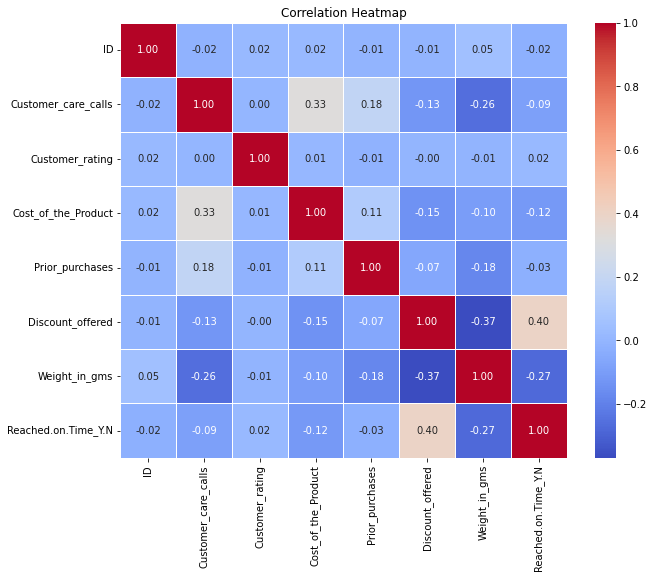

In [22]:
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()


# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()

Categorical Variables:
Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
Numerical Variables:
['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
ID
Median 1000.5
Mode 0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: ID, Length: 2000, dtype: int64


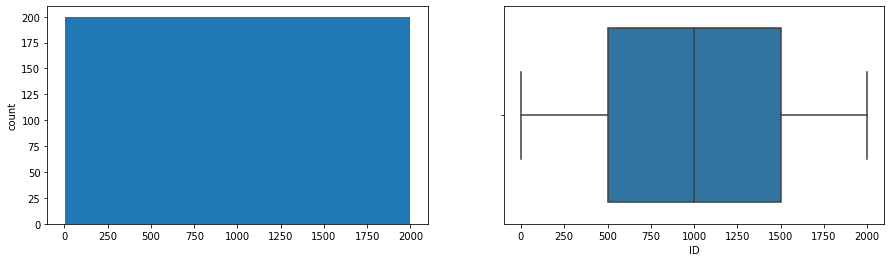

Customer_care_calls
Median 4.0
Mode 0    4
Name: Customer_care_calls, dtype: int64


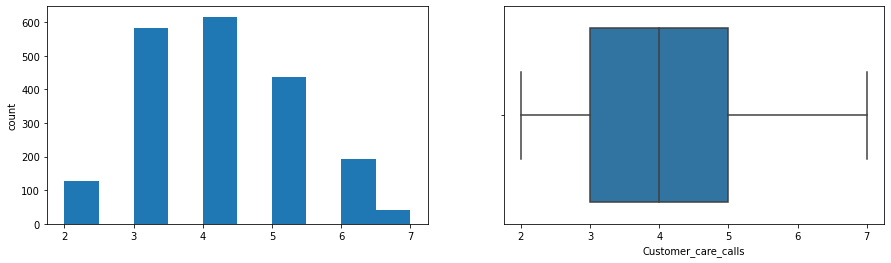

Customer_rating
Median 3.0
Mode 0    3
Name: Customer_rating, dtype: int64


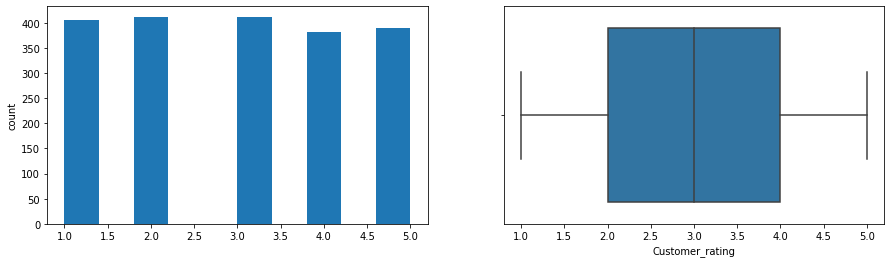

Cost_of_the_Product
Median 214.0
Mode 0    248
Name: Cost_of_the_Product, dtype: int64


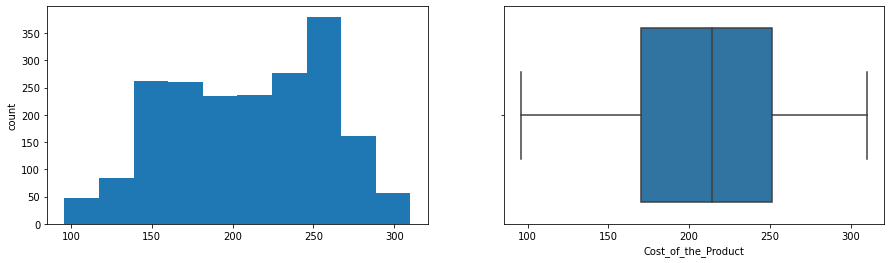

Prior_purchases
Median 3.0
Mode 0    3
Name: Prior_purchases, dtype: int64


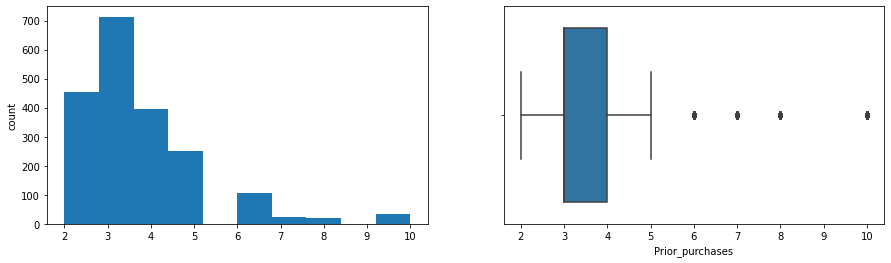

Discount_offered
Median 7.0
Mode 0    1
Name: Discount_offered, dtype: int64


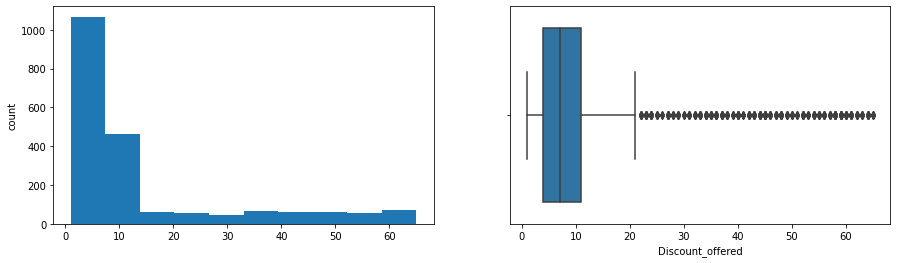

Weight_in_gms
Median 4067.5
Mode 0    1066.0
1    4883.0
Name: Weight_in_gms, dtype: float64


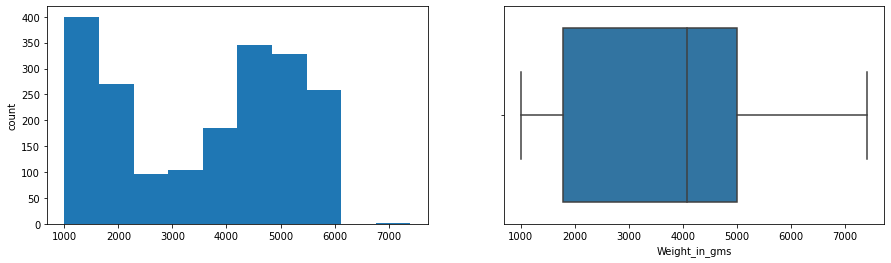

In [23]:
#CATEGORICAL AND NUMERIC COLUMNS

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
num_cols.remove('Reached.on.Time_Y.N')
print(num_cols)
#UNIVARIATE NUMERIC ANALYSIS


for col in num_cols:

    print(col)
    print("Median",df[col].median())
    print("Mode",df[col].mode())
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [13]:
if 'Reached on Time Y/N' in df.columns:
    df_unlabelled = df.drop(columns=['Reached on Time Y/N'])
else:
    df_unlabelled = df.copy()

In [14]:
categorical_cols = df_unlabelled.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df_unlabelled, columns=categorical_cols, drop_first=True)

# Check if any missing values exist and handle them
df_encoded = df_encoded.dropna()

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [15]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

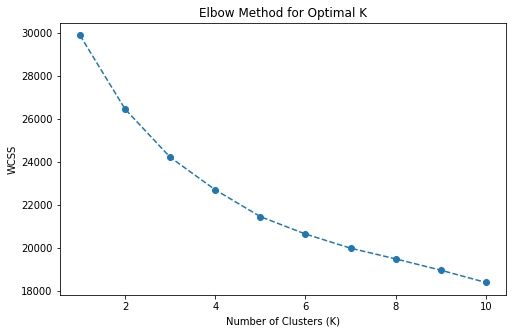

In [16]:
# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

optimal_k = 3  

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate performance metrics
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index for K={optimal_k}: {davies_bouldin:.4f}")

Silhouette Score for K=3: 0.1262
Davies-Bouldin Index for K=3: 2.4130


ValueError: Length of values (1992) does not match length of index (2000)